# Pergunta 1

Para achar o valor aproximado de $f(0.4500)$ sera utilizado a interpolação por lagrange, para isso sera utilizado 4 pontos ja que sera utilizado o polinomio de grau 3.


Nota: para maior precisão sera utilizado os pontos mais proximos a $0.4500$

In [3]:
%pip install -q numpy scipy matplotlib

Note: you may need to restart the kernel to use updated packages.


In [8]:
import numpy as np
import scipy as sci


data_x = [0.0000, 0.2500, 0.5000, 0.7500, 1.0000, 1.2500, 1.5000]
data_y = [1.0000, 0.9689, 0.8776, 0.7317, 0.5403, 0.3153, 0.0707]

x0 = 0.4500

# Serão escolhidos os 4 pontos mais próximos de x0 para a interpolação para maior precisão
x = data_x[0:4]
y = data_y[0:4]

print(f"Pontos escolhidos para a interpolação: x: {x} y: {y}")

# Calculando os coeficientes do polinômio interpolador
poly = sci.interpolate.lagrange(x, y)

# Calculando o valor de y para x0
y0 = poly(x0)

print(f"O valor de y para x0 é: {round(y0, 4)}")




Pontos escolhidos para a interpolação: x: [0.0, 0.25, 0.5, 0.75] y: [1.0, 0.9689, 0.8776, 0.7317]
O valor de y para x0 é: 0.9004


# Questão 2

Para achar a area na curva da questão anterior sera utilizado o metodo trapezoidal para integrar entre os pontos dados na questão 1.

In [30]:
import numpy as np

# Distancia entre os pontos
dx = data_x[1] - data_x[0]

area = np.trapz(data_y, data_x, dx = dx)

print(f"Área sob a curva: {round(area, 4)}")




Área sob a curva: 0.9923


# Questão 3

Sera determinada a dericada por derivação numerica

In [33]:
x = [0.0000, 0.2500, 0.5000, 0.7500, 1.0000]
y = [0.9994, 0.9704, 0.8773, 0.7305, 0.5402]

dy_dx = np.gradient(y, x)

print(f"x    : {np.around(np.array(x), 4)}")
print(f"y    : {np.around(np.array(y), 4)}")
print(f"dy_dx: {np.around(np.array(dy_dx), 4)}")



x    : [0.   0.25 0.5  0.75 1.  ]
y    : [0.9994 0.9704 0.8773 0.7305 0.5402]
dy_dx: [-0.116  -0.2442 -0.4798 -0.6742 -0.7612]


# Questão 4

In [68]:
from scipy.signal import find_peaks


# Parametros do circuito 
R = 100
L = 0.5
C = 1e-6

# Valores iniciais
v_0 = 20.0
i_0 = 0

# Passo de simulação 
h = 0.000001

# Tempo
t = 0.0

# variaveis do circuito
v = [v_0]
i = [i_0]

tempo_maximo = 0.1

# di/dt
def di(v, i, dt: float):
	return v * dt

# dv/dt
def dv(v, i, dt: float):
	return (-((R/L) * v) - (i / (L * C))) * dt

# Simulação do circuito
while t <= tempo_maximo:
	 
	v_ = v[-1] + dv(v[-1], i[-1], h)
	i_ = i[-1] + di(v[-1], i[-1], h)

	t += h

	v.append(v_)
	i.append(i_)

# Achando o valor máximo de corrente e o tempo que ele ocorre
i_max = max(i)
t_imax = i.index(i_max) * h

print(f"Valor maximo da corrente é {round(i_max, 4)}A em {round(t_imax, 4)}s")

# Achando os picos de tensão
v_maxs = find_peaks(v)[0]
# Achando os picos proximos de 0.5V
v_max_05 = [v[index] for index in v_maxs]
v_max_05_index = np.absolute(np.array(v_max_05) - 0.5).argmin() + 1
v_max_05 = v_max_05[v_max_05_index]
t_vmax_05 = v.index(v_max_05) * h
print(f"Proximo pico menor que 0.5V ocorre em {round(t_vmax_05, 4)}s com {round(v_max_05, 4)}V")


Valor maximo da corrente é 0.0127A em 0.0011s
Proximo pico menor que 0.5V ocorre em 0.04s com 0.3818V


# Questão 5

Estudo do comportamento de um circuito RLC (Resistor, Indutor e Capacitor) alimentado por uma fonte de tensão alternada (AC).

O circuito RLC é um modelo clássico usado para descrever muitos sistemas físicos. No entanto, quando a fonte de alimentação é uma função de tempo complexa (como uma onda senoidal), a solução analítica da EDO que descreve o circuito pode não ser facilmente obtida.

Aqui está um exemplo de tal problema:

Dado um circuito RLC série onde R = 100 Ohms, L = 0.3 H, C = 0.003 F e a fonte de tensão é v(t) = 10 * sin(2 * pi * 60 * t). Queremos encontrar a corrente i(t) no circuito.

A EDO que descreve este circuito é:

di/dt = (v(t) - R*i - q/C) / L

dq/dt = i

onde q é a carga no capacitor. Esta é uma EDO de segunda ordem não-linear que pode não ter uma solução analítica simples, especialmente porque v(t) é uma função senoidal. 

## a
Não é possivel achar solução analitica para a EDO pois é uma EDO de segunda ordem não-linear

## b 
Foi simulado o circuito a cada dt 

## c 
No codigo a seguir

## d
A solução foi adequada pois o circuito tem o comportamento esperado para um circuito RLC ao aumentar o valor capacitivo a tensão atrasa em relação a corrente e ao aumentar o valor indutivo a corrente atrasa em relação a tensão.






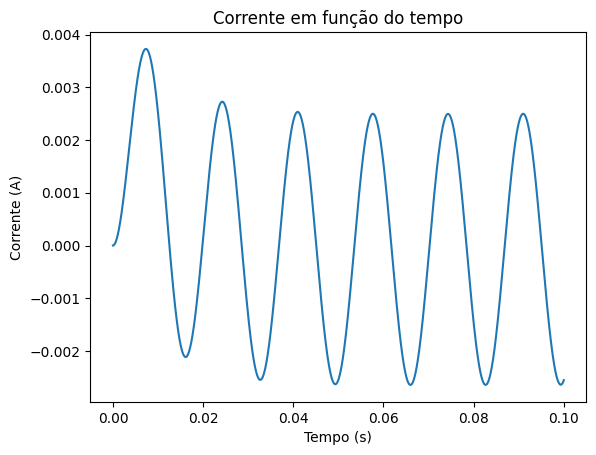

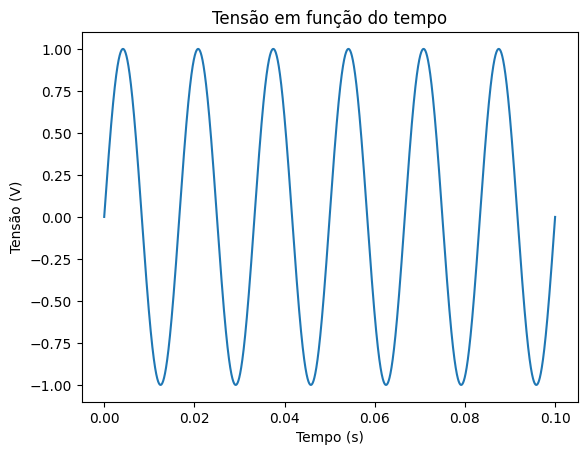

In [90]:
from scipy.signal import find_peaks
import matplotlib.pyplot as plt


# Parametros do circuito 
R = 100
L = 0.3
C = 0.003

# Valores iniciais
q_0 = 0.0
i_0 = 0.0

# Passo de simulação 
h = 0.000001

# Tempo
t = 0.0

# variaveis do circuito
q = [q_0]
i = [i_0]

tempo_maximo = 0.1

def v_t(t):
	return np.sin(2 * np.pi * 60 * t)


# di/dt
def di(i, t, q, dt: float):
	return (v_t(t) - R * i - q / C) * dt

# dq/dt
def dq(i, dt: float):
	return i * dt

# Simulação do circuito
while t <= tempo_maximo:
	q_ = q[-1] + dq(i[-1], h)
	i_ = i[-1] + di(i[-1], t, q[-1] , h)

	t += h

	q.append(q_)
	i.append(i_)

# Tempo
t = np.arange(0, tempo_maximo, h)
# Plotando o gráfico de corrente e tensão em função do tempo em grafiocos separados
plt.plot(t, i)
plt.title("Corrente em função do tempo")
plt.xlabel("Tempo (s)")
plt.ylabel("Corrente (A)")
plt.show()

plt.plot(t, v_t(t))
plt.title("Tensão em função do tempo")
plt.xlabel("Tempo (s)")
plt.ylabel("Tensão (V)")
plt.show()



